In [1]:
import sys
#!{sys.executable} -m pip install pandas
import pandas as pd
import numpy as np
import os
#!{sys.executable} -m pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings

import utils.exploratoryUtils

warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('../tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
if len(labels) > 0 and len(paths) > 0:
    print ('dataset is loaded')
else:
    print("dataset error")


dataset is loaded


*Convert into a dataframe*

In [3]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,../tess/OAF_disgust/OAF_bath_disgust.wav,disgust
1,../tess/OAF_disgust/OAF_live_disgust.wav,disgust
2,../tess/OAF_disgust/OAF_when_disgust.wav,disgust
3,../tess/OAF_disgust/OAF_rag_disgust.wav,disgust
4,../tess/OAF_disgust/OAF_chair_disgust.wav,disgust


### Exploratory Data Analysis

<AxesSubplot: xlabel='label', ylabel='count'>

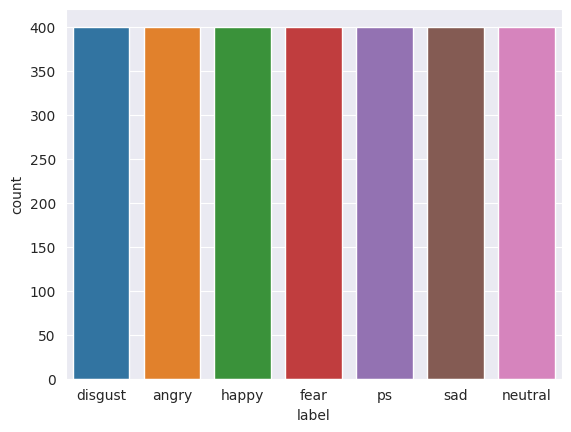

In [4]:
sns.countplot(x ='label', data= df)

In [5]:
#import sys
#module_path = os.path.abspath(os.path.join('..', 'utils'))
#if module_path not in sys.path:
#    sys.path.append(module_path)

## Add paths

In [6]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
#__file__ = str(Path.cwd().parents[0] / "utils")
# in standard python
module_path = str(Path.cwd().parents[0] / "utils")

if module_path not in sys.path:
    sys.path.append(module_path)
import utils.exploratoryUtils as exU

In [7]:
#exU.spectogram()

In [8]:
# paths = df['speech'][df['label']=="fear"]
# for path in paths:
#     data, sampling_rate =librosa.load(path)
#     print(sampling_rate)

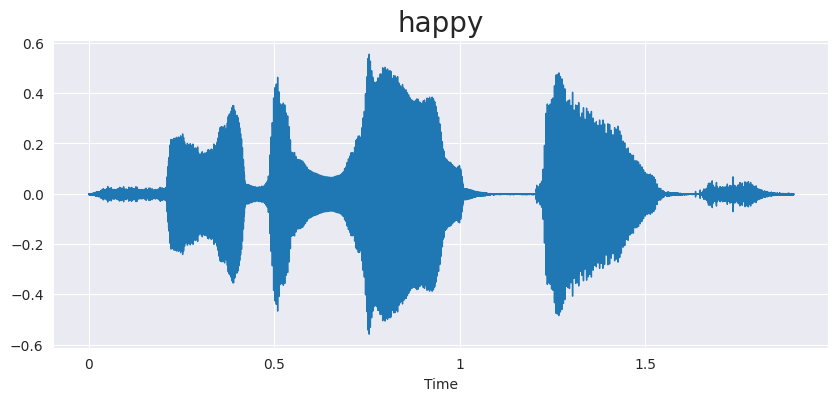

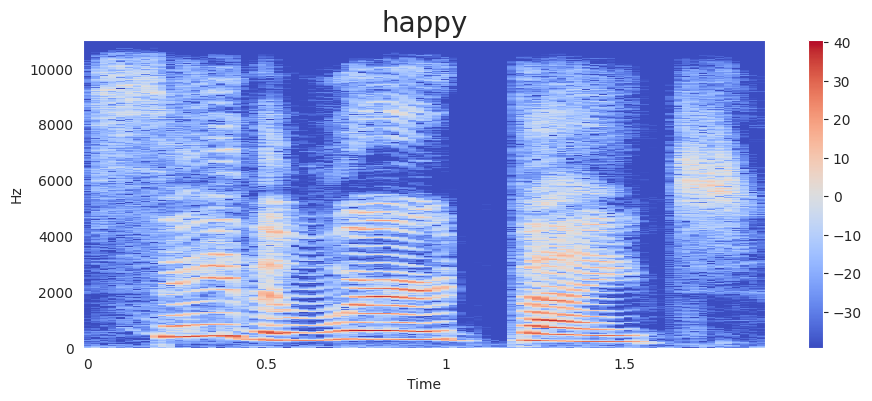

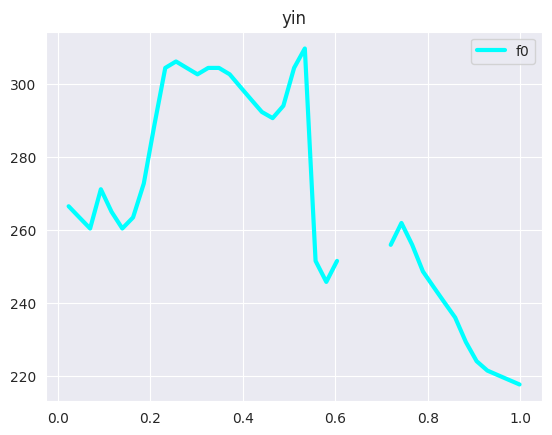

In [9]:
emotion = 'happy'
#df['speech'][df['label'] == 'fear'][1]
path = df['speech'][df['label']==emotion].iloc[2]
data, sampling_rate =librosa.load(path)
exU.waveplot(data, sampling_rate, emotion)
exU.spectogram(data, sampling_rate, emotion)
exU.extract_f0(path, offset=0.5, duration=1)
Audio(path)
# exU.extract_mfcc(path, offset=0.5, duration=3)
# exU.extract_f0(path)

(array([0.        , 0.02321995, 0.04643991, 0.06965986, 0.09287982,
        0.11609977, 0.13931973, 0.16253968, 0.18575964, 0.20897959,
        0.23219955, 0.2554195 , 0.27863946, 0.30185941, 0.32507937,
        0.34829932, 0.37151927, 0.39473923, 0.41795918, 0.44117914,
        0.46439909, 0.48761905, 0.510839  , 0.53405896, 0.55727891,
        0.58049887, 0.60371882, 0.62693878, 0.65015873, 0.67337868,
        0.69659864, 0.71981859, 0.74303855, 0.7662585 , 0.78947846,
        0.81269841, 0.83591837, 0.85913832, 0.88235828, 0.90557823,
        0.92879819, 0.95201814, 0.9752381 , 0.99845805, 1.021678  ,
        1.04489796, 1.06811791, 1.09133787, 1.11455782, 1.13777778,
        1.16099773, 1.18421769, 1.20743764, 1.2306576 , 1.25387755,
        1.27709751, 1.30031746, 1.32353741, 1.34675737, 1.36997732,
        1.39319728]),
 array([         nan, 266.56311105, 263.50137258, 260.47480118,
        271.22255216, 265.0278205 , 260.47480118, 263.50137258,
        272.79372842, 289.01488763

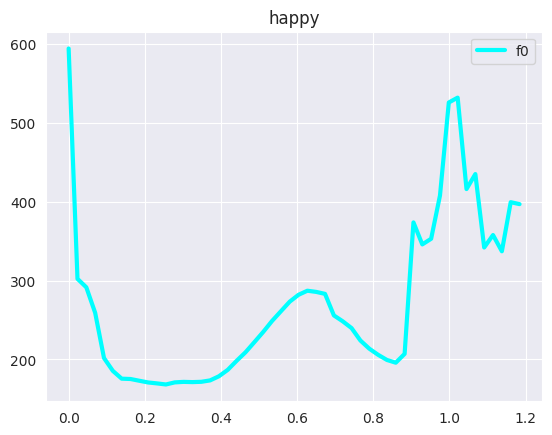

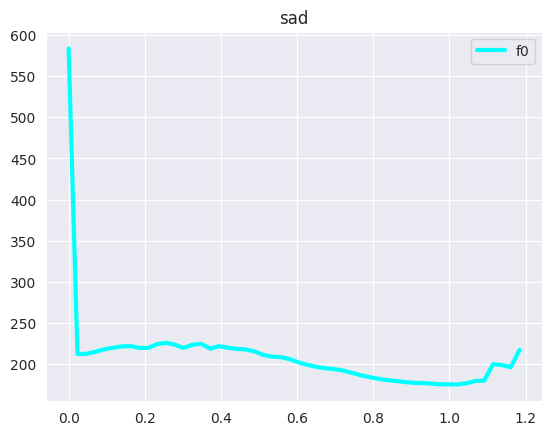

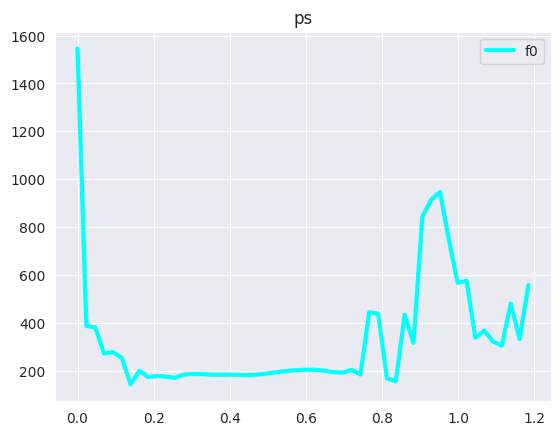

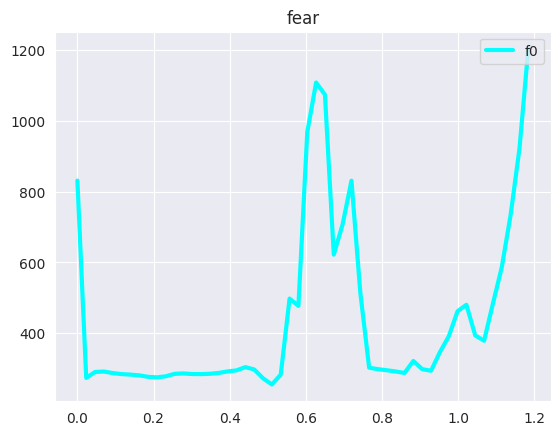

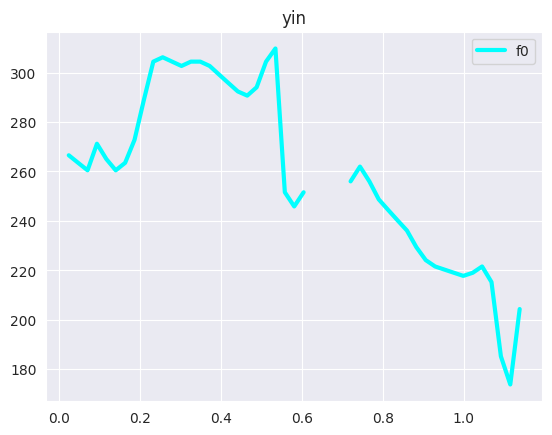

In [10]:
times, f0 = exU.average_over_one_emotion_f0(df['speech'][df['label']=='happy'], offset=0.5, duration=1.2, label="happy")
times, f0 = exU.average_over_one_emotion_f0(df['speech'][df['label']=='sad'], offset=0.5, duration=1.2, label="sad")
times, f0 = exU.average_over_one_emotion_f0(df['speech'][df['label']=='ps'], offset=0.5, duration=1.2, label="ps")
times, f0 = exU.average_over_one_emotion_f0(df['speech'][df['label']=='fear'], offset=0.5, duration=1.2, label="fear")
exU.extract_f0(path, offset=0.5, duration=2)

(array([ 0.01529923,  0.01788706,  0.01444848, ..., -0.00529214,
        -0.00623738,  0.        ], dtype=float32),
 22050)

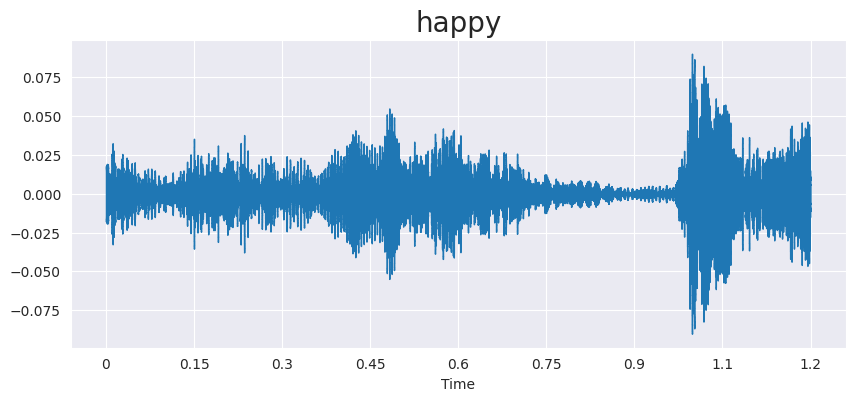

In [11]:
exU.average_waveplot(df['speech'][df['label']=='happy'], "happy")

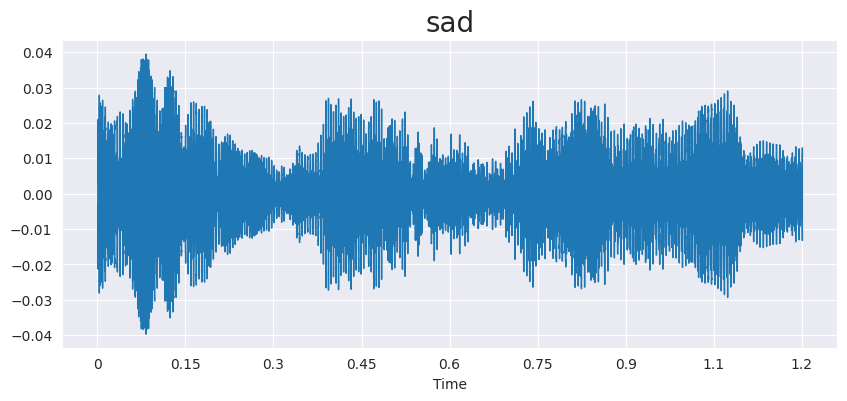

In [12]:
data_sad, sampling_rate = exU.average_waveplot(df['speech'][df['label']=='sad'], "sad")


(array([0.        , 0.02321995, 0.04643991, 0.06965986, 0.09287982,
        0.11609977, 0.13931973, 0.16253968, 0.18575964, 0.20897959,
        0.23219955, 0.2554195 , 0.27863946, 0.30185941, 0.32507937,
        0.34829932, 0.37151927, 0.39473923, 0.41795918, 0.44117914,
        0.46439909, 0.48761905, 0.510839  , 0.53405896, 0.55727891,
        0.58049887, 0.60371882, 0.62693878, 0.65015873, 0.67337868,
        0.69659864, 0.71981859, 0.74303855, 0.7662585 , 0.78947846,
        0.81269841, 0.83591837, 0.85913832, 0.88235828, 0.90557823,
        0.92879819, 0.95201814, 0.9752381 , 0.99845805, 1.021678  ,
        1.04489796, 1.06811791, 1.09133787, 1.11455782, 1.13777778,
        1.16099773, 1.18421769]),
 array([22050.        ,   213.5083247 ,   213.94272894,   218.5485988 ,
          220.75751314,   222.56584753,   224.28214534,   222.72229096,
          217.70325661,   216.70483676,   223.21037864,   229.59876944,
          231.9938236 ,   231.63080041,   231.29973067,   224.44947061

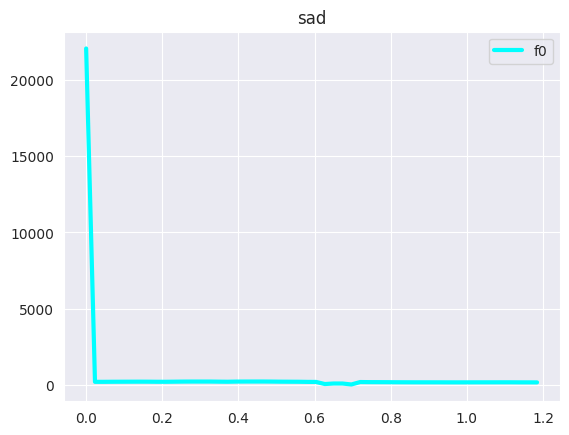

In [13]:
exU.extract_f0_data(data_sad, sampling_rate, "sad")